In [23]:
import open3d as o3d
import numpy as np
from voxel_grid import *
from point_cloud_FoV_utils import *

In [24]:
# trajectory_index = 0
image_width, image_height = np.array([1920, 1080])
# generate graph voxel grid features
voxel_size = int(128)
min_bounds = np.array([-251,    0, -241]) 
max_bounds = np.array([ 262, 1023,  511])

edge_prefix = str(voxel_size)
# get the graph max and min bounds
# graph_max_bound,graph_min_bound,graph_voxel_grid_integer_index_set,graph_voxel_grid_index_set,graph_voxel_grid_coords,original_index_to_integer_index = voxelizetion_para(
    # voxel_size=voxel_size, min_bounds=min_bounds, max_bounds=max_bounds)
results = voxelizetion_para(voxel_size=voxel_size, min_bounds=min_bounds, 
                            max_bounds=max_bounds)
graph_max_bound = results['graph_voxel_grid_max_bound']
graph_min_bound = results['graph_voxel_grid_min_bound']
graph_voxel_grid_integer_index_set = results['graph_voxel_grid_integer_index_set']
graph_voxel_grid_index_set = results['graph_voxel_grid_index_set']
graph_voxel_grid_coords = results['graph_voxel_grid_coords']
graph_voxel_grid_coords_array = results['graph_voxel_grid_coords_array']
original_index_to_integer_index = results['original_index_to_integer_index']

min_bounds: [-251    0 -241]
max_bounds: [ 262 1023  511]
graph max_bound: [ 388 1023  526]
graph min_bound: [-251    0 -241]
original_index_to_integer_index: {(0, 0, 0): 0, (0, 0, 1): 1, (0, 0, 2): 2, (0, 0, 3): 3, (0, 0, 4): 4, (0, 0, 5): 5, (0, 1, 0): 6, (0, 1, 1): 7, (0, 1, 2): 8, (0, 1, 3): 9, (0, 1, 4): 10, (0, 1, 5): 11, (0, 2, 0): 12, (0, 2, 1): 13, (0, 2, 2): 14, (0, 2, 3): 15, (0, 2, 4): 16, (0, 2, 5): 17, (0, 3, 0): 18, (0, 3, 1): 19, (0, 3, 2): 20, (0, 3, 3): 21, (0, 3, 4): 22, (0, 3, 5): 23, (0, 4, 0): 24, (0, 4, 1): 25, (0, 4, 2): 26, (0, 4, 3): 27, (0, 4, 4): 28, (0, 4, 5): 29, (0, 5, 0): 30, (0, 5, 1): 31, (0, 5, 2): 32, (0, 5, 3): 33, (0, 5, 4): 34, (0, 5, 5): 35, (0, 6, 0): 36, (0, 6, 1): 37, (0, 6, 2): 38, (0, 6, 3): 39, (0, 6, 4): 40, (0, 6, 5): 41, (0, 7, 0): 42, (0, 7, 1): 43, (0, 7, 2): 44, (0, 7, 3): 45, (0, 7, 4): 46, (0, 7, 5): 47, (1, 0, 0): 48, (1, 0, 1): 49, (1, 0, 2): 50, (1, 0, 3): 51, (1, 0, 4): 52, (1, 0, 5): 53, (1, 1, 0): 54, (1, 1, 1): 55, (1, 1, 2):

In [25]:

ground_true = np.array([[0.9957, 0.3427, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9576],
        [0.1816, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.8166, 0.0276],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.6452, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.3775, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9764, 0.1446, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8037, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.8594],
        [0.9955, 0.2941, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9072],
        [0.1111, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.7835, 0.0147],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4906, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9952, 0.2963, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9069, 0.1355, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.7654, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9821, 0.1834, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8840],
        [0.0485, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.6422, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4179, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9785, 0.2143, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8835, 0.0632, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.6806, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9462, 0.1281, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7729],
        [0.0297, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5851, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9954, 0.3467, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9549, 0.1351, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8322, 0.0526, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.6331, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9977],
        [0.8961, 0.0788, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7511],
        [0.0099, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.4863, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9925, 0.2589, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9165, 0.0942, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.7671, 0.0121, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.4567, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5686]])
pred_graph = np.array([[0.7910, 0.6015, 0.3190, 0.1215, 0.0839, 0.0701, 0.8314, 0.7274],
        [0.3954, 0.1611, 0.0952, 0.0790, 0.8844, 0.8440, 0.6185, 0.2845],
        [0.1283, 0.0966, 0.9159, 0.8999, 0.8035, 0.5335, 0.2372, 0.1306],
        [0.9376, 0.9305, 0.8985, 0.7636, 0.4780, 0.2546, 0.9486, 0.9513],
        [0.9383, 0.8883, 0.7588, 0.5834, 0.9588, 0.9589, 0.9482, 0.9325],
        [0.8895, 0.8282, 0.9627, 0.9607, 0.9556, 0.9439, 0.9239, 0.8797],
        [0.7981, 0.6281, 0.3321, 0.1139, 0.0802, 0.0674, 0.8388, 0.7387],
        [0.3883, 0.1512, 0.0897, 0.0747, 0.8900, 0.8624, 0.6161, 0.2659],
        [0.1167, 0.0898, 0.9204, 0.9111, 0.8191, 0.4961, 0.2190, 0.1212],
        [0.9431, 0.9358, 0.9109, 0.7840, 0.4646, 0.2409, 0.9537, 0.9505],
        [0.9455, 0.9018, 0.7596, 0.5645, 0.9613, 0.9623, 0.9561, 0.9342],
        [0.8916, 0.8344, 0.9644, 0.9639, 0.9615, 0.9449, 0.9236, 0.8977],
        [0.7996, 0.6107, 0.3173, 0.1052, 0.0709, 0.0585, 0.8437, 0.7279],
        [0.4033, 0.1396, 0.0800, 0.0652, 0.8943, 0.8524, 0.6363, 0.2446],
        [0.0992, 0.0756, 0.9246, 0.9130, 0.8439, 0.5102, 0.1873, 0.1057],
        [0.9443, 0.9404, 0.9202, 0.7712, 0.4128, 0.2053, 0.9568, 0.9547],
        [0.9469, 0.9057, 0.7464, 0.5172, 0.9623, 0.9633, 0.9598, 0.9438],
        [0.8898, 0.8238, 0.9653, 0.9650, 0.9628, 0.9469, 0.9213, 0.8928],
        [0.7889, 0.5927, 0.2902, 0.0988, 0.0658, 0.0531, 0.8464, 0.7209],
        [0.3801, 0.1280, 0.0730, 0.0585, 0.8960, 0.8457, 0.5843, 0.2236],
        [0.0870, 0.0669, 0.9256, 0.9065, 0.8030, 0.4442, 0.1639, 0.0929],
        [0.9474, 0.9388, 0.9065, 0.7346, 0.3955, 0.1893, 0.9598, 0.9542],
        [0.9442, 0.8988, 0.7400, 0.4824, 0.9660, 0.9630, 0.9586, 0.9429],
        [0.8825, 0.8016, 0.9686, 0.9660, 0.9592, 0.9460, 0.9154, 0.8820],
        [0.7748, 0.5760, 0.2630, 0.0962, 0.0617, 0.0484, 0.8462, 0.7050],
        [0.3622, 0.1201, 0.0689, 0.0538, 0.8936, 0.8354, 0.5750, 0.2141],
        [0.0803, 0.0614, 0.9260, 0.9063, 0.7911, 0.4334, 0.1490, 0.0870],
        [0.9491, 0.9391, 0.9039, 0.7293, 0.3637, 0.1758, 0.9610, 0.9555],
        [0.9418, 0.8838, 0.7211, 0.4437, 0.9671, 0.9638, 0.9553, 0.9343],
        [0.8756, 0.7591, 0.9694, 0.9667, 0.9599, 0.9458, 0.9117, 0.8377]])
pred_TLR = np.array([[1.0000, 1.0000, 0.6105, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9705, 0.1024, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5501],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.9627, 0.0804, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.5579, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9443, 0.0807, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.2429, 1.0000, 1.0000, 1.0000, 1.0000, 0.9120, 0.0413],
        [1.0000, 1.0000, 0.4830, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9367, 0.0449, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4439],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8986, 0.0336, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.3953, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9039, 0.0204, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.3718, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.3475],
        [1.0000, 1.0000, 0.3519, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.8248, 0.0119, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.3089],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7877, 0.0023, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.2644, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8022, 0.0048, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.2619, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6329],
        [1.0000, 0.9928, 0.2368, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.6968, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9955, 0.1940],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.6734, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9796, 0.1746, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.6667, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9825, 0.1410, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5305],
        [1.0000, 0.9723, 0.1018, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.5234, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9333, 0.0858],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5569, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9624, 0.0961, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.5262, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9225, 0.0647, 1.0000, 1.0000, 1.0000, 1.0000, 0.9284, 0.1397]])

#150 626

In [26]:
pred_TLR = np.array([[0.9701, 0.1907, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.6975],
        [0.0023, 0.0000, 0.0000, 0.0000, 1.0000, 0.9976, 0.3039, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8186, 0.0387, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4060, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.7056, 0.0271, 0.0000, 1.0000, 1.0000, 0.9499, 0.3832],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.7445, 0.0924, 0.0000, 0.0000],
        [0.7139, 0.0022, 0.0000, 0.0000, 0.0000, 0.0000, 0.9954, 0.2713],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7813, 0.0343, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.3712, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.7306, 0.0259, 0.0000, 0.0000, 1.0000, 0.9883],
        [0.5146, 0.0157, 0.0000, 0.0000, 1.0000, 0.8151, 0.2137, 0.0000],
        [0.0000, 0.0000, 0.9904, 0.5355, 0.0170, 0.0000, 0.0000, 0.0000],
        [0.2702, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7755, 0.0023],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9951, 0.3592, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.8058, 0.0420, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.6554, 0.0588, 0.0000, 0.0000, 0.0000, 0.9307, 0.3359],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6615, 0.0651, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3495, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0165, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3237, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8222, 0.0420, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.7714, 0.1288, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4193, 0.0164, 0.0000, 0.0000, 0.0000, 0.0000, 0.1490, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0120, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0293, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2136, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0465, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
ground_truth = np.array([[0.9394, 0.0212, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3850],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7971, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.1671, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.5594, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9341, 0.0436, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4149],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7412, 0.0000, 0.0000],
        [0.9561, 0.0576, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4282],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8376, 0.0024, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.1843, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.5833, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9650, 0.0505, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4523],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8262, 0.0024, 0.0000],
        [0.9897, 0.1038, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4498],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8914, 0.0065, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.2868, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.6937, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9928, 0.0948, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4859],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8075, 0.0000, 0.0000],
        [0.9898, 0.1432, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5268],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8883, 0.0223, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.2700, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.6993, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9925, 0.1060, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5374],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5271, 0.0000, 0.0000],
        [0.9976, 0.1689, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5674],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9377, 0.0317, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.3667, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.7743, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9973, 0.1818, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4247],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9737, 0.1265, 0.0000, 0.0000]])
pred_graph = np.array([[0.6127, 0.5140, 0.3655, 0.2371, 0.1565, 0.1265, 0.6581, 0.5556],
        [0.4123, 0.2668, 0.1745, 0.1388, 0.7643, 0.6372, 0.4861, 0.3090],
        [0.1991, 0.1513, 0.8595, 0.7553, 0.5752, 0.3852, 0.2471, 0.1866],
        [0.9101, 0.8623, 0.6651, 0.4739, 0.3015, 0.2375, 0.9346, 0.9184],
        [0.7916, 0.5794, 0.3840, 0.3143, 0.9451, 0.9374, 0.8898, 0.6739],
        [0.4586, 0.3611, 0.9511, 0.9453, 0.9106, 0.7371, 0.4873, 0.3840],
        [0.6300, 0.5432, 0.3778, 0.2519, 0.1633, 0.1331, 0.6704, 0.5799],
        [0.4205, 0.2781, 0.1812, 0.1456, 0.7508, 0.6639, 0.4913, 0.3287],
        [0.2119, 0.1620, 0.8511, 0.7378, 0.5768, 0.3861, 0.2496, 0.1920],
        [0.9100, 0.8378, 0.6713, 0.4868, 0.3030, 0.2374, 0.9371, 0.9127],
        [0.7718, 0.5696, 0.3706, 0.2941, 0.9493, 0.9414, 0.8700, 0.6437],
        [0.4392, 0.3421, 0.9534, 0.9520, 0.9136, 0.6967, 0.4751, 0.3606],
        [0.6539, 0.5742, 0.4214, 0.2772, 0.1623, 0.1234, 0.6560, 0.6115],
        [0.4677, 0.2895, 0.1867, 0.1418, 0.7103, 0.6589, 0.5418, 0.3459],
        [0.2215, 0.1650, 0.8151, 0.7505, 0.6161, 0.4262, 0.2641, 0.1985],
        [0.8980, 0.8326, 0.6928, 0.5132, 0.3105, 0.2327, 0.9382, 0.9062],
        [0.7679, 0.5564, 0.3549, 0.2624, 0.9528, 0.9452, 0.8565, 0.6644],
        [0.4150, 0.3064, 0.9562, 0.9548, 0.9059, 0.6662, 0.4276, 0.2817],
        [0.6028, 0.5651, 0.4457, 0.3003, 0.1752, 0.1306, 0.6376, 0.5685],
        [0.4719, 0.2978, 0.1961, 0.1497, 0.6983, 0.6378, 0.5070, 0.3508],
        [0.2291, 0.1723, 0.7822, 0.7194, 0.5848, 0.3995, 0.2672, 0.2005],
        [0.8702, 0.8203, 0.6783, 0.4767, 0.3086, 0.2248, 0.9264, 0.8649],
        [0.7768, 0.5557, 0.3395, 0.2339, 0.9476, 0.9219, 0.8322, 0.6380],
        [0.3634, 0.2095, 0.9540, 0.9396, 0.8444, 0.5912, 0.3177, 0.1957],
        [0.5800, 0.5108, 0.3972, 0.2569, 0.1575, 0.1106, 0.6367, 0.5613],
        [0.4427, 0.2926, 0.1887, 0.1370, 0.7128, 0.6540, 0.5183, 0.3490],
        [0.2267, 0.1635, 0.7880, 0.7234, 0.5990, 0.4082, 0.2710, 0.2021],
        [0.8567, 0.8062, 0.6890, 0.4804, 0.3130, 0.2023, 0.9147, 0.8619],
        [0.7615, 0.5388, 0.3179, 0.1794, 0.9467, 0.9060, 0.8043, 0.5461],
        [0.2780, 0.1858, 0.9521, 0.9221, 0.7945, 0.5033, 0.2611, 0.1871]])

# 60 553

In [27]:
pred_TLR = np.array([[1.0000, 1.0000, 0.9089, 0.1193, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.8306, 0.0404, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.6683, 0.0048, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5307],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8389, 0.0882, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.7783, 0.0109, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.6267, 0.0025, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.4318],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9954, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.7452, 0.0397, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.6803, 0.0048, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.4914, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9977, 0.3599],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9737, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.7329, 0.0188, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.5884, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.4280, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9885, 0.2506],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9503, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.6306, 0.0049, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.5385, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.9954],
        [0.3489, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9698, 0.2341],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9178, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])
ground_truth = np.array([[0.5386, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4721],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.4052, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9907, 0.2931, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9465, 0.2441, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9365, 0.1429, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8774, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9733],
        [0.5928, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4539],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9906, 0.3850, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9865, 0.2822, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9564, 0.2250, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9348, 0.1494, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8873, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.5903, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4556],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9923, 0.3982, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9731, 0.2654, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9434, 0.1614, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8968, 0.1390, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8568, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.4926, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4252],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9976, 0.3364, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9730, 0.2810, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9525, 0.1735, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8884, 0.1247, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8176, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.5271, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4398],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9864, 0.3437, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9732, 0.2196, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9302, 0.1542, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8812, 0.1465, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8383, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9949]])
pred_graph = np.array([[0.8136, 0.4461, 0.2204, 0.0719, 0.0256, 0.0135, 0.9095, 0.6532],
        [0.2712, 0.1055, 0.0331, 0.0170, 0.9399, 0.8819, 0.4160, 0.1553],
        [0.0512, 0.0239, 0.9668, 0.9244, 0.7449, 0.2601, 0.1106, 0.0437],
        [0.9842, 0.9713, 0.9036, 0.6407, 0.1989, 0.0913, 0.9915, 0.9870],
        [0.9660, 0.8829, 0.6227, 0.1734, 0.9954, 0.9937, 0.9846, 0.9536],
        [0.8444, 0.5910, 0.9968, 0.9951, 0.9884, 0.9679, 0.9026, 0.7748],
        [0.7474, 0.4040, 0.1984, 0.0692, 0.0250, 0.0122, 0.8899, 0.5980],
        [0.2425, 0.0979, 0.0318, 0.0166, 0.9329, 0.8624, 0.3851, 0.1492],
        [0.0481, 0.0240, 0.9670, 0.9254, 0.7461, 0.2487, 0.1011, 0.0406],
        [0.9846, 0.9721, 0.9084, 0.6550, 0.1778, 0.0808, 0.9917, 0.9861],
        [0.9659, 0.8876, 0.5831, 0.1595, 0.9950, 0.9930, 0.9848, 0.9517],
        [0.8361, 0.5292, 0.9960, 0.9942, 0.9883, 0.9681, 0.9146, 0.7869],
        [0.6651, 0.3522, 0.1789, 0.0640, 0.0213, 0.0096, 0.8552, 0.5308],
        [0.2248, 0.0864, 0.0276, 0.0132, 0.9119, 0.8305, 0.3557, 0.1374],
        [0.0428, 0.0213, 0.9627, 0.9178, 0.7209, 0.2149, 0.0898, 0.0332],
        [0.9824, 0.9690, 0.9042, 0.6384, 0.1642, 0.0653, 0.9909, 0.9851],
        [0.9606, 0.8779, 0.5365, 0.1490, 0.9943, 0.9919, 0.9831, 0.9482],
        [0.8211, 0.5001, 0.9959, 0.9937, 0.9875, 0.9630, 0.8975, 0.7674],
        [0.5099, 0.2835, 0.1344, 0.0496, 0.0179, 0.0079, 0.7935, 0.4478],
        [0.1782, 0.0676, 0.0234, 0.0117, 0.8873, 0.7804, 0.2896, 0.1167],
        [0.0384, 0.0200, 0.9610, 0.9082, 0.6702, 0.2002, 0.0744, 0.0283],
        [0.9838, 0.9704, 0.8957, 0.5836, 0.1416, 0.0564, 0.9919, 0.9857],
        [0.9592, 0.8598, 0.4769, 0.1318, 0.9948, 0.9918, 0.9810, 0.9452],
        [0.8003, 0.4241, 0.9961, 0.9937, 0.9861, 0.9623, 0.8682, 0.7336],
        [0.4640, 0.2626, 0.1270, 0.0447, 0.0145, 0.0065, 0.7519, 0.4206],
        [0.1765, 0.0605, 0.0190, 0.0089, 0.8766, 0.7525, 0.2740, 0.1059],
        [0.0343, 0.0162, 0.9597, 0.8991, 0.6222, 0.1864, 0.0665, 0.0226],
        [0.9830, 0.9680, 0.8826, 0.5666, 0.1327, 0.0492, 0.9921, 0.9859],
        [0.9538, 0.8492, 0.4363, 0.1233, 0.9951, 0.9919, 0.9792, 0.9341],
        [0.7731, 0.3331, 0.9967, 0.9944, 0.9860, 0.9524, 0.8468, 0.5160]])

# 1682

In [28]:
pred_TLR = np.array([[0.0864, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5448, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9507, 0.1168, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.6400, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.9977, 0.1986, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.6684, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.8209, 0.0250],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.6323, 0.0000, 0.0000, 0.0000],
        [0.0771, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5813, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9709, 0.1199, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.6410, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.9887, 0.1838, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.7185, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.2225],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9971, 0.3135, 0.0000, 0.0000],
        [0.0894, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5455, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9649, 0.1297, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.6452, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.9930, 0.1775, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.7218, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9976, 0.2982],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7681, 0.0000, 0.0000],
        [0.0905, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5444, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9704, 0.1122, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.6106, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.9846, 0.1911, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.7413, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.2559],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7338, 0.0000, 0.0000],
        [0.0998, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5117, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9718, 0.1103, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.6388, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.9899, 0.1932, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.7370, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.2772],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4390, 0.0000, 0.0000]])
pred_graph =np.array ([[0.4724, 0.2713, 0.1361, 0.0399, 0.0145, 0.0070, 0.7171, 0.3499],
        [0.1645, 0.0528, 0.0195, 0.0100, 0.8420, 0.4878, 0.1820, 0.0600],
        [0.0233, 0.0133, 0.8923, 0.6922, 0.2117, 0.0679, 0.0287, 0.0182],
        [0.9317, 0.8252, 0.3113, 0.0776, 0.0359, 0.0219, 0.9659, 0.9321],
        [0.6834, 0.1350, 0.0425, 0.0228, 0.9836, 0.9685, 0.8448, 0.3686],
        [0.0611, 0.0249, 0.9882, 0.9779, 0.8991, 0.6436, 0.0708, 0.0268],
        [0.4520, 0.2935, 0.1361, 0.0405, 0.0145, 0.0068, 0.6760, 0.3478],
        [0.1759, 0.0502, 0.0186, 0.0097, 0.8311, 0.4924, 0.2048, 0.0554],
        [0.0224, 0.0132, 0.8852, 0.6832, 0.2507, 0.0679, 0.0257, 0.0156],
        [0.9353, 0.8341, 0.3959, 0.1111, 0.0331, 0.0188, 0.9704, 0.9312],
        [0.7160, 0.2198, 0.0428, 0.0205, 0.9854, 0.9715, 0.8714, 0.4270],
        [0.0576, 0.0227, 0.9905, 0.9823, 0.9189, 0.6920, 0.0673, 0.0253],
        [0.4712, 0.3063, 0.1552, 0.0468, 0.0171, 0.0078, 0.7042, 0.3540],
        [0.2076, 0.0591, 0.0200, 0.0097, 0.8149, 0.4786, 0.2338, 0.0653],
        [0.0218, 0.0120, 0.8721, 0.7032, 0.2595, 0.0957, 0.0225, 0.0128],
        [0.9350, 0.8410, 0.3654, 0.1526, 0.0282, 0.0143, 0.9706, 0.9305],
        [0.7218, 0.2670, 0.0436, 0.0194, 0.9865, 0.9710, 0.8759, 0.4761],
        [0.0684, 0.0218, 0.9916, 0.9828, 0.9188, 0.6146, 0.0661, 0.0253],
        [0.4396, 0.2600, 0.1550, 0.0451, 0.0150, 0.0061, 0.6834, 0.3079],
        [0.1998, 0.0632, 0.0187, 0.0079, 0.8219, 0.4844, 0.2319, 0.0983],
        [0.0213, 0.0113, 0.8783, 0.7209, 0.2764, 0.1361, 0.0237, 0.0125],
        [0.9464, 0.8609, 0.4174, 0.2018, 0.0349, 0.0160, 0.9760, 0.9410],
        [0.7280, 0.2787, 0.0591, 0.0185, 0.9884, 0.9731, 0.8677, 0.5019],
        [0.0708, 0.0217, 0.9927, 0.9827, 0.9025, 0.4818, 0.0717, 0.0244],
        [0.4303, 0.2529, 0.1482, 0.0594, 0.0152, 0.0059, 0.6989, 0.3199],
        [0.2026, 0.0909, 0.0191, 0.0080, 0.8244, 0.5011, 0.2449, 0.1292],
        [0.0231, 0.0109, 0.8835, 0.7448, 0.2902, 0.1568, 0.0287, 0.0134],
        [0.9495, 0.8684, 0.4430, 0.2067, 0.0473, 0.0178, 0.9771, 0.9436],
        [0.7354, 0.2660, 0.0647, 0.0183, 0.9887, 0.9719, 0.8548, 0.4133],
        [0.0722, 0.0231, 0.9923, 0.9816, 0.8948, 0.3626, 0.0742, 0.0254]])
ground_truth = np.array([[1.0000, 0.9101, 0.0123, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.2306, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5693, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8787, 0.0093, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.1737, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.4951, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8773],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8346, 0.0049, 0.0000],
        [1.0000, 0.8904, 0.0068, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.2128, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5455, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8952, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.1887, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.5056, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8010],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.1083, 0.0000],
        [1.0000, 0.8760, 0.0067, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.2411, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5115, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8275, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.1724, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.5297, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8251],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.9203, 0.0258, 0.0000],
        [1.0000, 0.8786, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.1782, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5607, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8381, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.1706, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.4769, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7464],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4796, 0.0000, 0.0000],
        [1.0000, 0.8659, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.2334, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5364, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8533, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.1505, 0.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 0.4853, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5396],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9095, 0.0909, 0.0000, 0.0000]])
pred_graph = np.array([[4.9854e-01, 2.7459e-02, 4.1271e-04, 4.1807e-06, 1.1844e-07, 1.8162e-08,
         9.2876e-01, 1.2188e-01],
        [8.8260e-04, 9.2967e-06, 2.7952e-07, 4.3297e-08, 9.9240e-01, 5.8911e-01,
         5.0589e-03, 6.4183e-05],
        [1.6124e-06, 2.4286e-07, 9.9872e-01, 9.7220e-01, 4.4651e-02, 4.2519e-04,
         1.4252e-05, 2.4954e-06],
        [9.9989e-01, 9.9959e-01, 4.0417e-01, 2.6208e-03, 1.2184e-04, 2.1989e-05,
         9.9997e-01, 9.9989e-01],
        [9.7503e-01, 2.4875e-02, 6.3752e-04, 1.1733e-04, 9.9999e-01, 9.9998e-01,
         9.9826e-01, 3.6497e-01],
        [2.7296e-03, 4.3087e-04, 1.0000e+00, 9.9999e-01, 9.9941e-01, 8.7950e-01,
         6.4588e-03, 7.1771e-04],
        [4.2332e-01, 3.2967e-02, 3.6754e-04, 3.6285e-06, 1.0457e-07, 1.5374e-08,
         9.0138e-01, 1.1363e-01],
        [8.6297e-04, 8.6877e-06, 2.5606e-07, 3.7095e-08, 9.9205e-01, 5.4845e-01,
         6.9525e-03, 4.8110e-05],
        [1.3410e-06, 1.9096e-07, 9.9917e-01, 9.6937e-01, 6.0487e-02, 3.3133e-04,
         1.1770e-05, 2.0915e-06],
        [9.9993e-01, 9.9972e-01, 5.2807e-01, 2.5763e-03, 9.6875e-05, 1.9156e-05,
         9.9998e-01, 9.9995e-01],
        [9.7642e-01, 4.5447e-02, 5.5745e-04, 1.1121e-04, 1.0000e+00, 9.9999e-01,
         9.9935e-01, 4.8235e-01],
        [2.4739e-03, 3.3578e-04, 1.0000e+00, 9.9999e-01, 9.9967e-01, 9.3348e-01,
         5.7270e-03, 5.3663e-04],
        [5.0488e-01, 5.9991e-02, 4.2724e-04, 3.6115e-06, 7.5044e-08, 1.0290e-08,
         9.4473e-01, 1.7620e-01],
        [1.4619e-03, 9.4529e-06, 2.1225e-07, 2.7069e-08, 9.9500e-01, 7.0026e-01,
         1.3114e-02, 4.7703e-05],
        [1.1335e-06, 1.3881e-07, 9.9939e-01, 9.8657e-01, 8.9756e-02, 3.7207e-04,
         9.8101e-06, 1.5408e-06],
        [9.9994e-01, 9.9977e-01, 5.8449e-01, 4.6378e-03, 7.2517e-05, 1.3140e-05,
         9.9999e-01, 9.9997e-01],
        [9.8660e-01, 5.7203e-02, 3.9312e-04, 7.4816e-05, 1.0000e+00, 9.9999e-01,
         9.9933e-01, 5.5850e-01],
        [1.7522e-03, 1.9030e-04, 1.0000e+00, 1.0000e+00, 9.9974e-01, 8.6025e-01,
         2.7767e-03, 3.0583e-04],
        [5.6413e-01, 7.7432e-02, 6.8414e-04, 3.7563e-06, 9.3815e-08, 1.2663e-08,
         9.5183e-01, 1.8759e-01],
        [2.6241e-03, 1.2131e-05, 2.3690e-07, 2.8843e-08, 9.9609e-01, 7.9537e-01,
         1.9586e-02, 6.8329e-05],
        [1.1277e-06, 1.2264e-07, 9.9954e-01, 9.9086e-01, 1.2910e-01, 5.5796e-04,
         8.8588e-06, 1.1534e-06],
        [9.9994e-01, 9.9978e-01, 6.8814e-01, 5.0263e-03, 7.0943e-05, 1.0418e-05,
         9.9999e-01, 9.9998e-01],
        [9.9317e-01, 5.1005e-02, 3.9535e-04, 5.1455e-05, 1.0000e+00, 9.9999e-01,
         9.9942e-01, 5.3760e-01],
        [1.0090e-03, 1.1106e-04, 1.0000e+00, 1.0000e+00, 9.9976e-01, 5.3528e-01,
         1.2452e-03, 1.4749e-04],
        [6.4667e-01, 1.2451e-01, 1.1787e-03, 5.0779e-06, 9.1794e-08, 1.2454e-08,
         9.6552e-01, 2.6534e-01],
        [4.3415e-03, 1.7223e-05, 2.3580e-07, 2.8042e-08, 9.9621e-01, 8.2799e-01,
         3.2427e-02, 9.9092e-05],
        [1.2833e-06, 1.1657e-07, 9.9951e-01, 9.9315e-01, 1.9704e-01, 8.4840e-04,
         1.0694e-05, 9.8529e-07],
        [9.9989e-01, 9.9951e-01, 7.3548e-01, 6.9776e-03, 8.3668e-05, 8.4251e-06,
         9.9999e-01, 9.9997e-01],
        [9.9386e-01, 4.4387e-02, 3.3710e-04, 3.3750e-05, 1.0000e+00, 9.9999e-01,
         9.9882e-01, 2.6969e-01],
        [6.4217e-04, 7.7446e-05, 1.0000e+00, 1.0000e+00, 9.9947e-01, 1.7385e-01,
         7.1784e-04, 9.5930e-05]])        

In [29]:
ground_truth = np.reshape(ground_truth, (5,8,6,))
pred_graph = np.reshape(pred_graph, (5,8,6,))
pred_TLR = np.reshape(pred_TLR, (5,8,6,))
# get the mse loss between ground truth and pred_graph and pred_TLR
mes_loss_graph = np.mean((ground_truth - pred_graph) ** 2)
mes_loss_TLR = np.mean((ground_truth - pred_TLR) ** 2)
print('mes_loss_graph:', mes_loss_graph)
print('mes_loss_TLR:', mes_loss_TLR)

mes_loss_graph: 0.0654268014809111
mes_loss_TLR: 0.13490833195833335


In [30]:
diff_graph = (ground_truth - pred_graph)**2
diff_TLR = (ground_truth - pred_TLR)**2

diff_graph1 = ground_truth - pred_graph
diff_TLR1 = ground_truth - pred_TLR

In [31]:
# calculate the distribution loss between ground truth and pred_graph and pred_TLR
dist_loss_graph = np.mean(np.abs(ground_truth - pred_graph))
dist_loss_TLR = np.mean(np.abs(ground_truth - pred_TLR))
print('dist_loss_graph:', dist_loss_graph)
print('dist_loss_TLR:', dist_loss_TLR)


dist_loss_graph: 0.11446653808254999
dist_loss_TLR: 0.18931458333333334


In [32]:
# pred_graph = np.power(pred_graph, 2)
# 

In [33]:
# # # max min normalization pred_graph

# max_value = np.max(pred_graph)
# min_value = np.min(pred_graph)
# pred_graph = (pred_graph - min_value) / (max_value - min_value)
# # 


In [34]:
# pred_graph

In [35]:
import open3d as o3d
import numpy as np

# Define the origin, color, and voxel size
origin = np.array([[0], [0], [0]], dtype=np.float64)  # Origin at [0, 0, 0]
color = np.array([[0], [0], [0]], dtype=np.float64)  # White color
voxel_size = 1.0  # Voxel size of 1

# Create the voxel grid
voxel_grid = o3d.geometry.VoxelGrid.create_dense(
    origin=origin,
    color=color,
    voxel_size=voxel_size,
    width=5*voxel_size,
    height=8*voxel_size,
    depth=6*voxel_size
)

In [37]:
import open3d as o3d
import numpy as np

# Create the voxel grid
voxel_grid = o3d.geometry.VoxelGrid.create_dense(origin, color, voxel_size=voxel_size, width=5*voxel_size, height=8*voxel_size, depth=6*voxel_size)

# Create a PointCloud from the VoxelGrid
pcd = o3d.geometry.PointCloud()

# Add the centers of the voxels to the PointCloud
for voxel in voxel_grid.get_voxels():
    pcd.points.append(voxel.grid_index)

# Convert the points to a Vector3dVector
pcd.points = o3d.utility.Vector3dVector(np.asarray(pcd.points))

# Assign colors to the points in the PointCloud
colors = np.zeros((len(pcd.points), 3))
for i in range(len(pcd.points)):
    # colors[i] = ground_truth[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
    colors[i] = pred_graph[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
    # colors[i] = pred_TLR[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
    # colors[i] = diff_graph[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
    # colors[i] = diff_TLR[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
    # colors[i] = diff_graph1[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
    # colors[i] = diff_TLR1[int(pcd.points[i][0]), int(pcd.points[i][1]), int(pcd.points[i][2])]
pcd.colors = o3d.utility.Vector3dVector(colors)

In [38]:
o3d.visualization.draw([pcd],point_size=10,raw_mode=False,show_skybox=False,bg_color=[0,0,0,1])

In [1]:
# plot figure
graph_mse = [0.0008
,0.016
,0.050
,0.072
,0.079
,0.085
]
graph_mae = [0.010
,0.050
,0.119
,0.163
,0.184
,0.205
]
tlr_mse = [0.004
,0.026
,0.079
,0.138
,0.1755
,0.195
]
tlr_mae = [0.016
,0.053
,0.116
,0.178
,0.217
,0.238
]

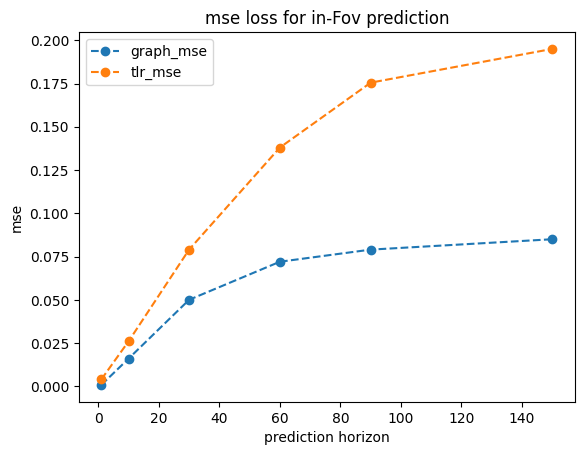

In [7]:
# plot figure
import matplotlib.pyplot as plt
import numpy as np
# plot graph_mse and tlr_mse, with dash line and dot mark on each point
# x axis is 1,10,30,60,90,150
x = [1,10,30,60,90,150]
plt.plot(x, graph_mse, label='graph_mse', linestyle='--', marker='o')
plt.plot(x, tlr_mse, label='tlr_mse', linestyle='--', marker='o')
plt.legend()
plt.xlabel('prediction horizon')
plt.ylabel('mse')
plt.title('mse loss for in-Fov prediction')
plt.show()




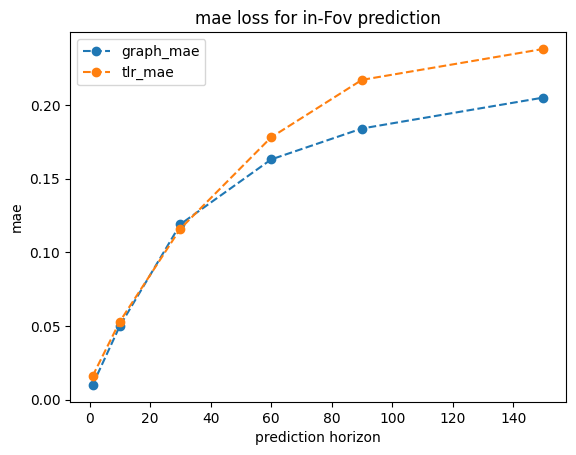

In [8]:
# plot mae loss
plt.figure()
plt.plot(x, graph_mae, label='graph_mae', linestyle='--', marker='o')
plt.plot(x, tlr_mae, label='tlr_mae', linestyle='--', marker='o')
plt.legend()
plt.xlabel('prediction horizon')
plt.ylabel('mae')
plt.title('mae loss for in-Fov prediction')
plt.show()
